#  Assignment 4

## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Dylan Wijman |10651012|dylanwijman@hotmail.com|
|Eline Steensma|10589813|elinesteensma@gmail.com|
|Sjoerd Paardekooper|10278397|sjoerd.paardekooper@gmail.com|

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='link to your selfie'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


# P1 Parsing wikipedia

#### Hint: 
Gebruik de code uit `ParseWikipediaDump.ipynb` in de NoteBook folder.

1. Haal de laatste NL wikipedia dump op van <https://dumps.wikimedia.org/nlwiki/20160111/>. Je hebt de file <https://dumps.wikimedia.org/nlwiki/20160111/nlwiki-20160111-pages-articles.xml.bz2> nodig, maar kunt als je dat wat groot vindt eerst beginnen met <https://dumps.wikimedia.org/nlwiki/20160111/nlwiki-20160111-pages-articles1.xml.bz2>
2. We gaan een dataframe maken met informatie over **elke** pagina in de NL wikipedia. Dit dataframe bevat voor elke pagina de volgende 4 kolommen:
    1. page id (dit wordt de index)
    2. titel van de pagina
    3. het aantal secties
    4. een lijst met alle namen van de secties.
    5. het aantal woorden op de pagina
3. Sla dit dataframe op als pickle bestand.
4. Maak een plot waarin je op de x-as het aantal secties zet en op de y-as het aantal paginas met zoveel secties. Zorg dat het goed leesbaar is door eventueel een log schaal te gebruiken.
5. Bereken het gemiddeld aantal secties, de mediaan, en geef de (een?) pagina met het maximale aantal secties.
6. Plot het aantal secties tegen het aantal woorden en bereken de correlatie.
7. Wat is het gemiddeld aantal woorden per sectie op NL Wikipedia?

#### Voorbeeld
Voor <https://nl.wikipedia.org/wiki/Albert_Speer> ziet dit er (op dit moment van schrijven) als volgt uit:
1. page id is $1$
2. titel is _Albert Speer_
3. Aantal secties is 12
4. Sectie titels zijn (maar dan zonder de nummering)
```
1	Voor 1933
2	In dienst van Hitler
3	Speer de organisator
4	Hitlers laatste bevelen aan Speer
5	Arrestatie en gevangenisstraf
6	Speer als de 'nette nazi'
7	Nalatenschap
8	Het einde van de mythe
9	Wetenswaardig
10	Publicaties
11	Literatuur
12	Film
```


 
    
    

In [18]:
%matplotlib inline
import pandas as pd
import re
from lxml import etree 
from bz2file import BZ2File
import codecs
from nltk.tokenize import RegexpTokenizer
from collections import Counter


In [3]:
#f = '/home/dylan/Downloads/nlwiki-20160111-pages-articles1.xml.bz2'
f = 'nlwiki-20160111-pages-articles1.xml.bz2'
with BZ2File(f) as xml_file:
    context = etree.iterparse(xml_file,  tag= '{http://www.mediawiki.org/xml/export-0.10/}page')
    dfdict = {}
    for _, elem in context:
        title= elem.findtext('{http://www.mediawiki.org/xml/export-0.10/}title') 
        page_id = int(elem.findtext('{http://www.mediawiki.org/xml/export-0.10/}id'))
        pagetext=elem.findtext('{http://www.mediawiki.org/xml/export-0.10/}revision/{http://www.mediawiki.org/xml/export-0.10/}text')
        sectionnames = re.findall('== (.*?) ==', pagetext)
        numsections = len(sectionnames)
        wordcount = len(RegexpTokenizer(r'\w+').tokenize(pagetext))
        dfdict[page_id] = [title, sectionnames, numsections, wordcount]


In [19]:
dfwiki = pd.DataFrame.from_dict(dfdict, orient='index')
dfwiki.columns = ['Titel', 'Namen secties', 'Aantal Secties', 'Aantal Woorden']

dfwiki.head()
#Sla dit dataframe op als pickle bestand.
#dfwiki.to_pickle('dfwiki.pkl')

,Titel,Namen secties,Aantal Secties,Aantal Woorden
1,Albert Speer,"[Voor 1933, In dienst van Hitler, Speer de org...",11,2756
2,Andre Agassi,"[Biografie, Carrière, Tegenwoordig, Palmres, E...",10,11879
5,Groen (partij),"[Naam, Geschiedenis, Ontstaan van de beweging ...",34,6009
6,Anthony Fokker,"[Levensloop, Trivia, Bibliografie, Externe links]",4,1048
7,Albert Plesman,[],0,1193


In [ ]:
#4 Maak een plot waarin je op de x-as het aantal secties zet en op de y-as het aantal paginas met zoveel secties.
#Zorg dat het goed leesbaar is door eventueel een log schaal te gebruiken.

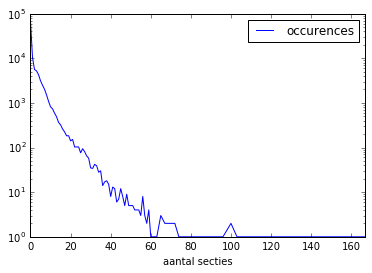

In [30]:
c = Counter(dfwiki['Aantal Secties'])

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df.columns = ['aantal secties', 'occurences']
df.plot(x='aantal secties', y='occurences', logy=True)

In [64]:
# 5 Bereken het gemiddeld aantal secties, de mediaan, en geef de (een?) pagina met het maximale aantal secties.
sections_av =  dfwiki['Aantal Secties'].mean()
print 'Gemiddeld aantal secties:', sections_av
sections_med = dfwiki['Aantal Secties'].median()
print 'Mediaan secties:', sections_med

maxpage = dfwiki[dfwiki['Aantal Secties'] == dfwiki['Aantal Secties'].max()]
max_no = maxpage.get_value(maxpage.index[0],'Aantal Secties')
pagetitle = maxpage.get_value(maxpage.index[0],'Titel')
print 'Maximale aantal secties:', max_no
print 'Pagina met maximaal aantal secties:', pagetitle


Gemiddeld aantal secties: 1.98105790503
Mediaan secties: 0.0
Maximale aantal secties: 167
Pagina met maximaal aantal secties: Werelderfgoedlijst


In [69]:
# 6 Plot het aantal secties tegen het aantal woorden en bereken de correlatie.

In [67]:
# 7 Wat is het gemiddeld aantal woorden per sectie op NL Wikipedia?
total_words = dfwiki['Aantal Woorden'].sum()
total_sections = dfwiki['Aantal Secties'].sum()

av_no_word_sections = total_words/total_sections
print 'Gemiddeld aantal woorden per sectie:', av_no_word_sections

Gemiddeld aantal woorden per sectie: 289
